## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [2]:
#list of regimens
regimens = merged_df["Drug Regimen"].unique()
regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


capomulin_df = merged_df.loc[merged_df["Drug Regimen"]== "Capomulin"]
ketapril_df = merged_df.loc[merged_df["Drug Regimen"]== "Ketapril"]
naftisol_df = merged_df.loc[merged_df["Drug Regimen"]== "Naftisol"]
infubinol_df = merged_df.loc[merged_df["Drug Regimen"]== "Infubinol"]
stelasyn_df = merged_df.loc[merged_df["Drug Regimen"]== "Stelasyn"]
ramicane_df = merged_df.loc[merged_df["Drug Regimen"]== "Ramicane"]
propriva_df = merged_df.loc[merged_df["Drug Regimen"]== "Propriva"]
zoniferol_df = merged_df.loc[merged_df["Drug Regimen"]== "Zoniferol"]
placebo_df = merged_df.loc[merged_df["Drug Regimen"]== "Placebo"]
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"]== "Ceftamin"]

DrugDFs=[capomulin_df, ketapril_df,naftisol_df,infubinol_df,stelasyn_df,ramicane_df,propriva_df,zoniferol_df,placebo_df,ceftamin_df]

TumorMeans = []
TumorMedians = []
TumorVar = []
TumorStanDev = []
TumorSEMs = []

for df in DrugDFs:
    TumorMeans.append(np.mean(df["Tumor Volume (mm3)"]))
    TumorMedians.append(np.median(df["Tumor Volume (mm3)"]))  
    TumorVar.append(np.var(df["Tumor Volume (mm3)"], ddof=0))
    TumorStanDev.append(np.std(df["Tumor Volume (mm3)"], ddof=0))
    TumorSEMs.append(st.sem(df["Tumor Volume (mm3)"]))

SummaryStatsTable = pd.DataFrame({"Drug Regimen": regimens, 
                                  "Tumor Volume Mean": TumorMeans,
                                  "Tumor Volume Median": TumorMedians,
                                  "Variance": TumorVar,
                                  "Standard Deviation": TumorStanDev,
                                  "Standard Error": TumorSEMs})
IndexedSummaryStatsTable = SummaryStatsTable.set_index("Drug Regimen")
IndexedSummaryStatsTable

,Tumor Volume Mean,Tumor Volume Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


## Bar plots

Text(0, 0.5, 'Data Points')

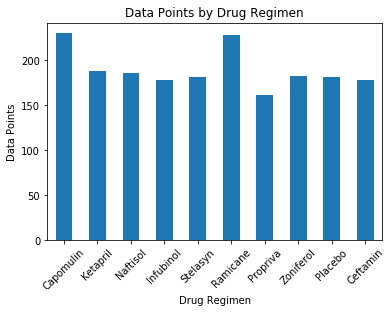

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

IndexedSummaryStatsTable["Data Points"] = [len(data) for data in DrugDFs]

IndexedSummaryStatsTable["Data Points"].plot(x="Drug Regimen", y="Data Points", kind="bar",
                                      title = "Number of Data Points per Drug Regimen", rot = 45).set_ylabel("Data Points")


    

Text(0, 0.5, 'Data Points')

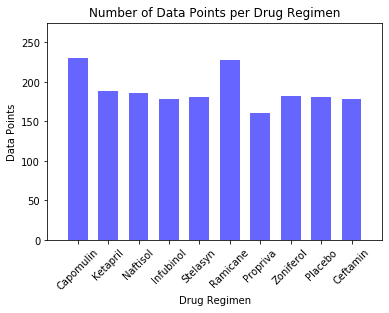

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = SummaryStatsTable["Drug Regimen"]
y_axis = IndexedSummaryStatsTable["Data Points"]

plt.bar(x_axis, y_axis,width=0.65, color='b', alpha=0.6, align="center")
plt.xticks(rotation=45)
plt.xlim(-1, len(x_axis))
plt.ylim(0, 275)
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen